# <center>Лабораторная работа 5</center>

##### Васютинский В.А.
##### М8О-408Б-20

Используя явную и неявную конечно-разностные схемы, а также схему Кранка - Николсона, решить начально-краевую задачу для дифференциального уравнения параболического типа. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x, t)$. Исследовать зависимость погрешности от сеточных параметров  $\tau, h$.

In [1]:

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Вариант 5:<br><br>





dU/dt = (dU)^2 / (dx)^2 + 0.5 * exp(-0.5t) * cos(x) <br>

U_x(0, t) = exp(-0.5t)<br>

U_x(Pi/2, t) = exp(-0.5t)<br>

U(x, 0) = sin(x)<br>

Аналитическое решение:

U(x, t) = exp(-0.5t) * sin(x)

**Для решения задачи используются 3 вида конечно-разностных схем:**
**1. явная схема**

$\dfrac{u^{k+1}_i - u^k_i}{\tau} = a\dfrac{u^{k}_{i-1} - 2u^{k}_{i} + u^{k}_{i+1}}{h^2} + b\dfrac{u^{k}_{i+1} - u^{k}_{i-1}}{2h} + cu^{k}_{i} + f(x_i, t^{k+1})$

**2. неявная схема**

$\dfrac{u^{k+1}_i - u^k_i}{\tau} = a\dfrac{u^{k+1}_{i-1} - 2u^{k+1}_{i} + u^{k+1}_{i+1}}{h^2} + b\dfrac{u^{k+1}_{i+1} - u^{k+1}_{i-1}}{2h} + cu^{k+1}_{i} + f(x_i, t^k)$

**3. схема Кранка-Николсона** ($\theta = 0.5$)

$\dfrac{u^{k+1}_i - u^k_i}{\tau} = \theta\bigg(a\dfrac{u^{k+1}_{i-1} - 2u^{k+1}_{i} + u^{k+1}_{i+1}}{h^2} + b\dfrac{u^{k+1}_{i+1} - u^{k+1}_{i-1}}{2h} + cu^{k+1}_{i} + f(x_i, t^k)\bigg) + (1 - \theta)\bigg(a\dfrac{u^{k}_{i-1} - 2u^{k}_{i} + u^{k}_{i+1}}{h^2} + b\dfrac{u^{k}_{i+1} - u^{k}_{i-1}}{2h} + cu^{k}_{i} + f(x_i, t^{k+1})\bigg)$

**Для решения задачи используются 3 вида аппроксимации граничных условий:**
**1. двухточечная аппроксимация с первым порядком**

$\dfrac{du}{dx}\bigg|^{k+1}_{j = 0} = \dfrac{u^{k+1}_1 - u^{k+1}_0}{h}$

$\dfrac{du}{dx}\bigg|^{k+1}_{j = N} = \dfrac{u^{k+1}_N - u^{k+1}_{N-1}}{h}$

**2. трехтоточная аппроксимация со вторым порядком**

$\dfrac{du}{dx}\bigg|^{k+1}_{j = 0} = \dfrac{-3u^{k+1}_0 + 4u^{k+1}_1 - u^{k+1}_2}{2h}$

$\dfrac{du}{dx}\bigg|^{k+1}_{j = N} = \dfrac{u^{k+1}_{N - 2} - 4u^{k+1}_{N - 1} + 3u^{k+1}_N}{2h}$

**3. двухточечная аппроксимация со вторым порядком**

Разложим в граничных узлах на точном решении значение $u^{k+1}_1$ и $u^{k+1}_{N-1}$ в окрестности точки $x=0$ в ряд Тейлора по переменной $x$ до третьей производной включительно

$u^{k+1}_1 = u(0 + h, t^{k + 1}) = u^{k+1}_0 + \dfrac{du}{dx}\bigg|^{k + 1}_{0}\cdot h + \dfrac{d^2u}{dx^2}\bigg|^{k + 1}_{0}\cdot\dfrac{h^2}{2}$

$u^{k+1}_{N-1} = u(l - h, t^{k + 1}) = u^{k+1}_N - \dfrac{du}{dx}\bigg|^{k + 1}_{N}\cdot h + \dfrac{d^2u}{dx^2}\bigg|^{k + 1}_{N}\cdot\dfrac{h^2}{2}$

Input equation type (example: explicit / implicit)

In [6]:
equation_type = str(input())

explicit


In [2]:
N = 15
K = 400
T = 1
curr_time = 0

params = {
    'l': np.pi,
    'psi':  lambda x: np.sin(x),
    'f':    lambda x, t: 0.5 * np.exp(-0.5 * t) * np.cos(x),
    'phi0': lambda t: np.exp(-0.5 * t),
    'phi1': lambda t: -np.exp(-0.5 * t),
    'solution': lambda x, t: np.exp(-0.5 * t) * np.sin(x),
    'bound_type': 'a1p1',
}

In [3]:
params['bound_type'] = 'a1p1'

In [4]:
def implicit_solver(self, N, K, T):
    lst = get_zeros(N, K)
    a = lst[0]
    b = lst[1]
    c = lst[2]
    d = lst[3]
    u = lst[4]

    for i in range(1, N - 1):
        u[0][i] = self.data.psi(i * self.h)
    u[0][-1] = 0

    for k in range(1, K):
        self.calculate(a, b, c, d, u, k, N, T, K)
        u[k] = tma(a, b, c, d)

    return u

def explicit_solver(self, N, K, T):
    u = np.zeros((K, N))
    t = np.arange(0, T, T / K)
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    for j in range(1, N - 1):
        u[0][j] = self.data.psi(j * self.h)

    for k in range(1, K):
        for j in range(1, N - 1):


            u[k][j] = (u[k - 1][j + 1] * (self.a * self.tau / self.h ** 2.0 + self.b * self.tau / 2.0 / self.h)
                        + u[k - 1][j] * (-2 * self.a * self.tau / self.h ** 2.0 + self.c * self.tau + 1)
                        + u[k - 1][j - 1] * (self.a * self.tau / self.h ** 2.0 - self.b * self.tau / 2.0 / self.h)
                        + self.tau * self.data.f(x[j], t[k]))

        if self.data.bound_type == 'a1p1':
            u[k][0] = (self.data.phi0(t[k]) - self.alpha / self.h * u[k][1]) / (self.beta - self.alpha / self.h)
            u[k][-1] = (self.data.phi1(t[k]) + self.gamma / self.h * u[k][-2]) / (self.delta + self.gamma / self.h)
        elif self.data.bound_type == 'a1p2':
            u[k][0] = (((2.0 * self.alpha * self.a / self.h / (2.0 * self.a - self.h * self.b)) * u[k][1] +
                        (self.alpha * self.h / self.tau / (2.0 * self.a - self.h * self.b)) * u[k - 1][0] +
                        (self.alpha * self.h / (2.0 * self.a - self.h * self.b)) * self.data.f(0, t[k]) -
                        self.data.phi0(t[k]) /
                        ((2.0 * self.alpha * self.a / self.h / (2.0 * self.a - self.h * self.b)) + (
                                self.alpha * self.h / self.tau / (2.0 * self.a - self.h * self.b)) -
                            (self.alpha * self.h / (2.0 * self.a - self.h * self.b)) * self.c - self.beta)))
            u[k][-1] = (((2.0 * self.gamma * self.a / self.h / (2.0 * self.a + self.h * self.b)) * u[k][-2] +
                            (self.gamma * self.h / self.tau / (2.0 * self.a + self.h * self.b)) * u[k - 1][-1] +
                            (self.gamma * self.h * self.c / (2.0 * self.a + self.h * self.b)) * self.data.f(
                        self.data.l, t[k]) + self.data.phi1(t[k])) / (
                                (2.0 * self.gamma * self.a / self.h / (2.0 * self.a + self.h * self.b)) + (
                                self.gamma * self.h / self.tau / (2.0 * self.a + self.h * self.b)) - (
                                        self.gamma * self.h * self.c / (
                                        2.0 * self.a + self.h * self.b)) * self.c + self.delta))
        elif self.data.bound_type == 'a1p3':
            u[k][-1] = (self.data.phi1(k * self.tau) + u[k][-2] / self.h + 2 * self.tau * u[k - 1][-1] / self.h) / \
                        (1 / self.h + 2 * self.tau / self.h)
    return u

In [7]:
def calculate(self, a, b, c, d, u, k, N, T, K):
        t = np.arange(0, T, T / K)
        for j in range(1, N):
            a[j] = self.sigma
            b[j] = -(1 + 2 * self.sigma)
            c[j] = self.sigma
            d[j] = -u[k - 1][j]

        if self.data.bound_type == 'a1p1':
            a[0] = 0
            b[0] = -(self.alpha / self.h) + self.beta
            c[0] = self.alpha / self.h
            d[0] = self.data.phi0(t[k])
            a[-1] = self.gamma / self.h
            b[-1] = self.gamma / self.h + self.delta
            c[-1] = 0
            d[-1] = self.data.phi1(t[k])
        elif self.data.bound_type == 'a1p2':
            a[0] = 0
            b[0] = -(1 + 2 * self.sigma)
            c[0] = self.sigma
            d[0] = -(u[k - 1][0] + self.sigma * self.data.phi0(k * self.tau)) - \
                   self.tau * self.data.f(0, k * self.tau)
            a[-1] = self.sigma
            b[-1] = -(1 + 2 * self.sigma)
            c[-1] = 0
            d[-1] = -(u[k - 1][-1] + self.sigma * self.data.phi1(k * self.tau)) - \
                    self.tau * self.data.f((N - 1) * self.h, k * self.tau)
        elif self.data.bound_type == 'a1p3':
            a[0] = 0
            b[0] = -(1 + 2 * self.sigma)
            c[0] = self.sigma
            d[0] = -((1 - self.sigma) * u[k - 1][1] + self.sigma / 2 * u[k - 1][0]) - self.tau \
                   * self.data.f(0, k * self.tau) - self.sigma * self.data.phi0(
                k * self.tau)
            a[-1] = self.sigma
            b[-1] = -(1 + 2 * self.sigma)
            c[-1] = 0
            d[-1] = self.data.phi1(k * self.tau) + self.data.f((N - 1) * self.h, k * self.tau) \
                    * self.h / (2 * self.tau) * u[k - 1][-1]
            
            
def crank_nicolson_solver(self, N, K, T):
    theta = 0.5
    lst = get_zeros(N, K)
    a = lst[0]
    b = lst[1]
    c = lst[2]
    d = lst[3]
    u = lst[4]
    for i in range(1, N - 1):
        u[0][i] = self.data.psi(i * self.h)

    for k in range(1, K):
        self.calculate(a, b, c, d, u, k, N, T, K)

        tmp_imp = tma(a, b, c, d)

        tmp_exp = np.zeros(N)
        tmp_exp[0] = self.data.phi0(self.tau)
        for j in range(1, N - 1):
            tmp_exp[j] = self.sigma * u[k - 1][j + 1] + (1 - 2 * self.sigma) * u[k - 1][j] + \
                            self.sigma * u[k - 1][j - 1] + self.tau * self.data.f(j * self.h, k * self.tau)
        tmp_exp[-1] = self.data.phi1(self.tau)

        for j in range(N):
            u[k][j] = theta * tmp_imp[j] + (1 - theta) * tmp_exp[j]
    return u   
solver = ParabolicSolver(params, equation_type)

In [165]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [8]:
print("Sigma: ",solver.sigma)

Sigma:  0


In [9]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    ax.plot_surface(x, t, z1, cmap=cm.PiYG,
                    linewidth=0, antialiased=True)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.PiYG,
                           linewidth=0, antialiased=True)
    # # Customize the z axis
    # ax.set_zlim(-1.01, 1.01)

    # # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

In [10]:
def draw_u_x(dict_, N, K, T, time=0, save_file="plot_u_x.png"):
    fig = plt.figure()
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    
#     print(z1)

    plt.title('U from x')
    plt.plot(x[0:-2], z1[time][0:-2], color='b', label='numerical')
    plt.plot(x[0:-2], z2[time][0:-2], color='r', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    error = compare_error(dict_ans)
    for i in range(len(error)):
        tmp = 0
        for j in error[i]:
            tmp += j
        err.append(tmp/len(error[i])/1000)
    plt.title('Error from t')
    plt.plot(t, err, color='r', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

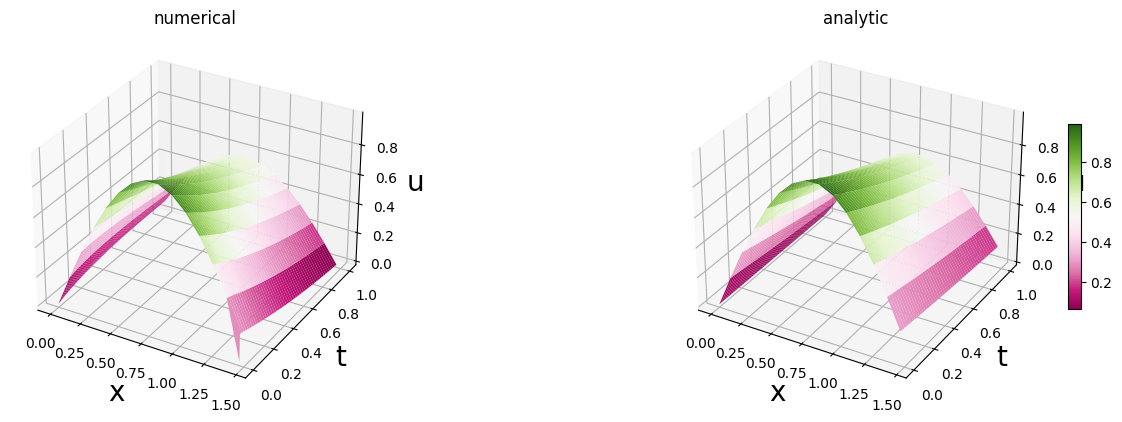

In [168]:
draw(dict_ans, N, K, T)

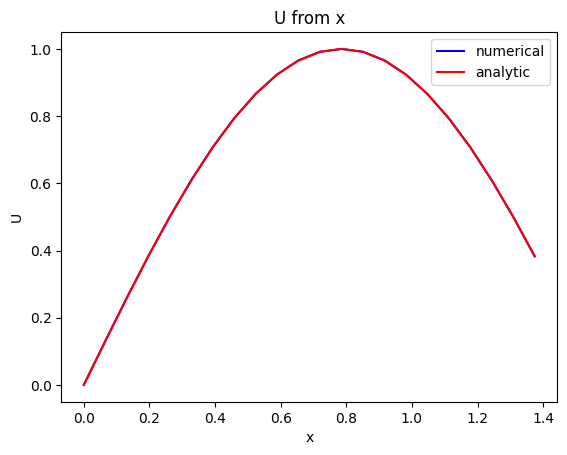

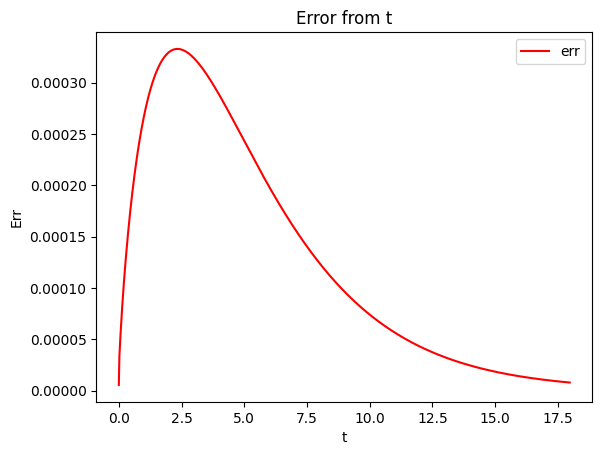

In [146]:
draw_u_x(dict_ans, N, K, T, curr_time)

In [24]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

First elements in error array:

In [170]:
print(error[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20791169081775973]


Middle elements in error array:

In [171]:
print(error[int(K/2)])

[0.08095185139751016, 0.08214171835941295, 0.07259736480814499, 0.05578028877416352, 0.034827738907620476, 0.012410764974746247, 0.009359049269149877, 0.028978246775185013, 0.04556153075816716, 0.05881917224222655, 0.06900656894318624, 0.0768491053366892, 0.08344422456718442, 0.09014232406084183, 0.09840895012861858]


Last elements in error array:

In [172]:
print(error[-1])

[0.09055482532632883, 0.09148265370892378, 0.08140044343220618, 0.06320148022433109, 0.03969934574890277, 0.013478931111025494, 0.013225544152500768, 0.038621004982602236, 0.061411831095585456, 0.0808211577094683, 0.09657802524501752, 0.10887280343931482, 0.11828472256599448, 0.1256865751419088, 0.13213268259724725]


In [173]:
print(f'Average error in each N: {avg_err}')

Average error in each N: 0.0825298966446859


In [174]:
print(f'Average error\t\t: {avg_err / K}')

Average error		: 0.00020632474161171475


In [20]:
equation_type = str(input())

implicit


Sigma:  1.3131225400046977


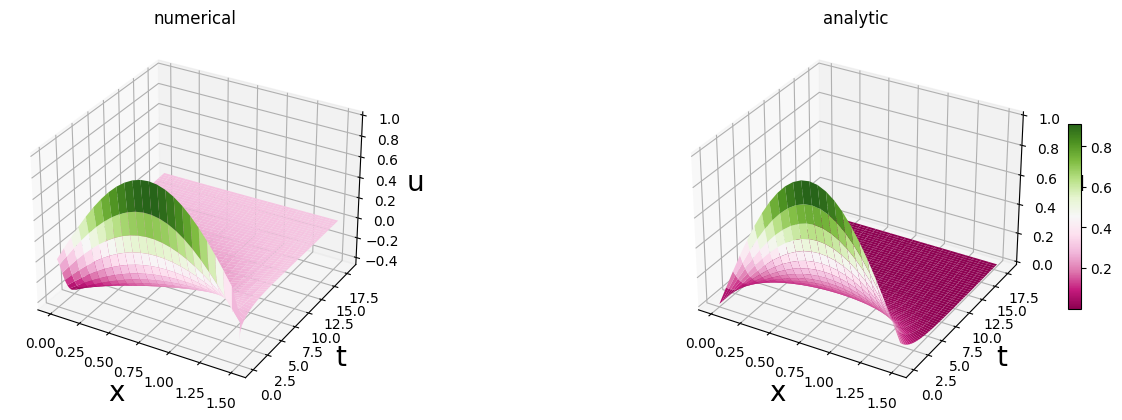

In [21]:
N = 24
K = 800
T = 18
curr_time = 0
params['bound_type'] = 'a1p1'
solver = ParabolicSolver(params, equation_type)
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }
print("Sigma: ",solver.sigma)
draw(dict_ans, N, K, T)

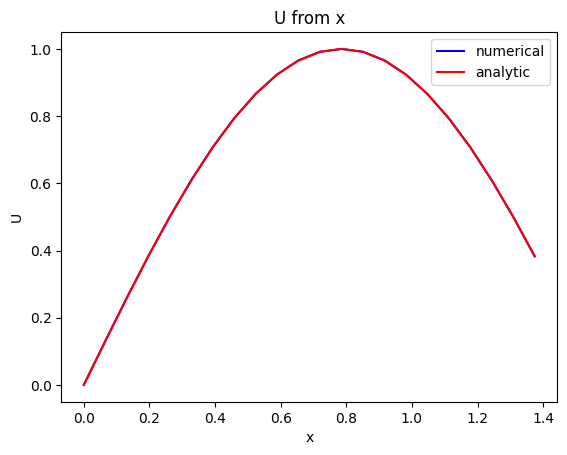

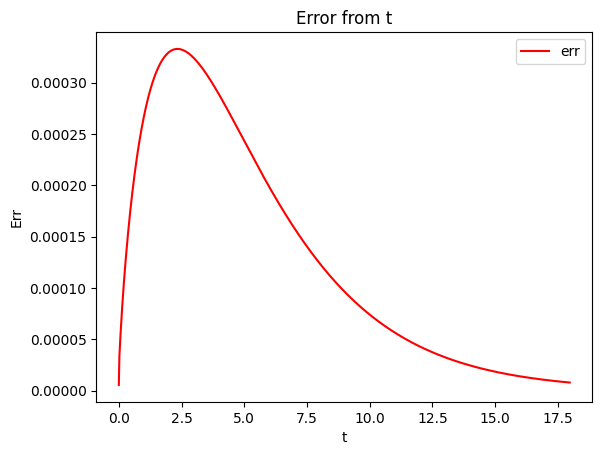

In [22]:
draw_u_x(dict_ans, N, K, T, curr_time)

In [25]:
print(error[int(K/2)])

[0.15004323820867924, 0.15003908897981438, 0.14936905048260124, 0.14802353229739648, 0.1459959414158312, 0.14328297214661226, 0.1398848734691995, 0.13580568803885318, 0.1310534574451474, 0.12564038882426248, 0.11958297851440504, 0.11290208911315253, 0.10562297703359104, 0.09777526844980879, 0.08939288235767477, 0.0805139003391925, 0.071180383492943, 0.06143813786389161, 0.05133643055787989, 0.040927659544548405, 0.030266980922935578, 0.019411898133123107, 0.008421818232685858, 0.002642419092700911]


In [26]:
print(error[-1])

[0.012334146727334022, 0.012334100112082183, 0.012272310337819916, 0.012148946166527067, 0.011964485133377644, 0.0117197139928831, 0.011415727524155636, 0.011053925651563613, 0.010636008848490695, 0.010163971804324615, 0.009640095348056793, 0.009066936635819759, 0.00844731762416014, 0.007784311865663499, 0.007081229678526632, 0.006341601756619593, 0.005569161301297136, 0.00476782477051005, 0.0039416713544368955, 0.003094921299717477, 0.0022319132162416586, 0.001357080511163347, 0.00047492710421674275, 0.00040999741362547854]


In [27]:
print(f'Average error in each N: {avg_err}')

Average error in each N: 0.008100242309372108


#### Вывод
Как видно из графиков погрешности, в первую очередь на неё влияет веоичина па-
раметра tau (чем она меньше, тем погрешность ниже), а вот количество шагов h у
меня оказывает негативное влияние, увеличивая погрешность многократно
Отдельно стоит отметить, что конечно-разностные схемы для решения уравнений
параболического типа имеют высокую точность и, при достаточной мелкости tau,
способны достигать настолько маленькую погрешность, что ей можно будет прене-
бречь при решении реальных задач математической физики.